# Project: Investigate a Dataset - TMDB Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
<li>Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
<li>There are some odd characters in the ‘cast’ column.
<li>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars,accounting for inflation over time. 
<br>
<br>
The columns in this data are listed below: 
<li> id - A unique serial number
<li> imdb_id - A unique serial number generated by imdb
<li> popularity - The popularity of the movie
<li> budget - The movie budget
<li> revenue - Revenue made from movie sales
<li> original_title - Movie Title
<li> cast - The main actors
<li> homepage - Production company website
<li> director - Movie director
<li> tagline - Movie tagline
<li> keywords - Keywords to search for the movie
<li> overview - A brief description
<li> runtime - Number of views
<li> genres - Movie class/genre
<li> production_companies - Companies that produced the movie
<li> release_date - Date of release of movie
<li> vote_count - Number of votes
<li> vote_average - Average rating
<li> release_year - Year of release
<li> budget_adj - 2010 dollar Adjusted budget
<li> revenue_adj - 2010 dollar adjusted revenue

## Question(s) for Analysis

</a><li>Which genres are most popular from year to year? 
<li>What kinds of properties are associated with movies that have high revenues?

In [2]:
# Importing necessary packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### General Properties


In [3]:
# Loading the data

movies = pd.read_csv('tmdb-movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Checking details of the data...

In [4]:
# Number of rows and columns

movies.shape 

(10866, 21)

In [5]:
# Types of data in each column

movies.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [6]:
# Columns with null values

movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [7]:
# Checking for duplicated rows

movies.duplicated().sum()

1

In [8]:
# Number of unique values in each column

movies.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

### Data Cleaning

In cleaning the data the following will be performed:
<li> Removal of extraneous columns (columns not needed in the analysis)
<li> Removing null values
<li> Removing duplicates 
<li> Some columns e.g. cast have their values separated by '|' character. Each value will be splitted into a list of elements

Removal of extraneous columns

In [9]:
# List below contains the extraneous columns

extraneous=['homepage','tagline','keywords','overview','release_date','imdb_id','budget_adj','revenue_adj']

movies.drop(extraneous, axis=1, inplace=True) #drops the columns in the 'extraneous' lists
movies.head() #confirms the removal of the columns

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015


In [10]:
movies.shape # New number of rows and columns

(10866, 13)

In [11]:
# Dropping duplicate rows

movies.drop_duplicates(inplace=True)

In [12]:
# Dropping rows with null values

movies.dropna(inplace=True)

In [13]:
# Number of rows and columns of the modified data

movies.shape

(9772, 13)

In [14]:
# Confirming absence of null values

movies.isna().any()

id                      False
popularity              False
budget                  False
revenue                 False
original_title          False
cast                    False
director                False
runtime                 False
genres                  False
production_companies    False
vote_count              False
vote_average            False
release_year            False
dtype: bool

In [15]:
# Confirming the absence of duplicate

movies.duplicated().sum()

0

Let's separate the values of 'Cast', 'Genres' and 'Production Companies' into indivual elements of lists. We do this by creating a function **col_split** that takes in a series (the affected column) and splits each item in the series by the **"|"** sign and returns a list.

In [16]:
def col_split(column):
    d=column.str.split('|')
    return d

In [17]:
# Separating the values of 'Cast', 'Genres' and 'Production Companies' into indivual elements of lists

movies['cast'] = col_split(movies['cast'])

movies['genres'] = col_split(movies['genres'])

movies['production_companies'] = col_split(movies['production_companies'])

movies.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015


The data is ready for Exploratory Analysis

<a id='eda'></a>
## Exploratory Data Analysis

## Research Question 1 (Which genres are most popular from year to year?)

To perform analysis based on this question, **'genres'**, one of the three concerned columns is in form of a list. In order to work on it, we must use the **'df.explode()'** function on 'genres' column. This will replicate the rows and assign each element in the list to its respective replicated row. 

_Note: In order to preserve, the data's form, we would create a copy of the data (data_q1) and work with the changes mentioned above_

In [18]:
data_q1 = movies.copy() # Creates a copy of the cleaned movies data

data_q1 = data_q1.explode('genres') # Explodes the 'genres' column

In [19]:
data_q1.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Action,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Adventure,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Science Fiction,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Thriller,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,Action,"[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015


For every year, a genre of movie comes out multiple times. Thus, the mean popularity of each genre will be used to represent its popularity for that year. Thus we would get the mean popularity and use the **df.groupby()** funtion to group the mean popularities into years and genres as shown below.

In [20]:
# Grouping mean popularity by years of release and genres

group1 = data_q1.groupby(['release_year', 'genres'], as_index=False).popularity.mean() 

group1

,release_year,genres,popularity
0,1960,Action,0.590724
1,1960,Adventure,0.700981
2,1960,Comedy,0.396000
3,1960,Crime,0.346480
4,1960,Drama,0.566305
...,...,...,...
1037,2015,Science Fiction,2.348382
1038,2015,TV Movie,0.280440
1039,2015,Thriller,1.486609
1040,2015,War,1.438548


The **group1** dataframe above shows all the genres and their mean popularities for each year. To display only the genre with the highest popularity each year, I created another dataframe **(group2)** having only the release year and its highest popularity. I then merged it with **group1** into a data **'pop_movies'** using a right merge as shown in the following cells:

In [21]:
# Grouping max. popularity of 'group1' data by years of release

group2 = pd.DataFrame(group1.groupby(['release_year']).popularity.max())

In [22]:
group2.head()

,popularity
release_year,
1960,0.811910
1961,2.631987
1962,0.942513
1963,2.180410
1964,0.930959


In [23]:
# Merging 'group1' and 'group2' data on 'popularity' column using 'right-merge'

pop_movies = pd.merge(group1, group2, how='right', on='popularity')

pop_movies

,release_year,genres,popularity
0,1960,Thriller,0.811910
1,1961,Animation,2.631987
2,1962,Adventure,0.942513
3,1963,Animation,2.180410
4,1964,War,0.930959
5,1965,Music,0.968850
6,1966,Animation,0.751857
7,1967,Animation,2.550704
8,1968,Mystery,1.519456
9,1969,Crime,0.948020


The dataframe above shows all the years and their most popular movies. Year 1971 had two entries (Family and Fantasy had equal popularities).Let's see what movie genres have emerged most-popular all-time

In [24]:
# Counts the number of each genre's appearance

pop_movies.genres.value_counts()

Animation          13
Adventure          11
Fantasy             9
Crime               5
Science Fiction     4
War                 4
Family              3
Music               2
Mystery             2
Action              1
Western             1
History             1
Thriller            1
Name: genres, dtype: int64

So, it appears animations movies are the most popular movies in 56 years, followed with a close margin by Adventure and then Fantasy

## Research Question 2 (What kinds of properties are associated with movies that have high revenues?)

To answer this question, I focused on revenues greater than the mean revenue by creating a separate dataframe for the analysis, then I did the following:
<li>I analysed the revenues against columns with numerical values using scatterplots and checked for patters and correlations
<li>I analysed the revenues against columns with categorical values by taking a value_count of each column. Then I took note of the top 10 values and used them in my conclusion.

### Reviewing details about 'revenues' column

We will be creating visuals here on. Let's create a function **"label"** that will label the graphs. The function will take arguments **title**, **x** and **y** which represent **the title of the graph, labels for the horizontal and vertical axis respectively**

In [25]:
def label(title, x, y):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)

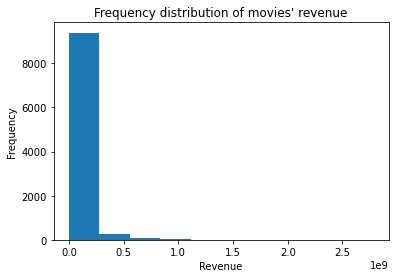

In [26]:
plt.hist(movies.revenue)
label("Frequency distribution of movies' revenue", 'Revenue', 'Frequency')

It appears the data is highly skewed to the right. Let us look at the statistical summary

In [27]:
movies.revenue.describe() # Gives a statistical description of the revenues column

count    9.772000e+03
mean     4.423121e+07
std      1.225889e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.104729e+07
max      2.781506e+09
Name: revenue, dtype: float64

More than half the data have zero revenues. This must have been some error in the data collection process. Notwithstanding, we will choose values greater than the mean as 'high revenues'. Let's create a dataframe **hi_rev** with this info for the analysis

### Creating and exploring new dataframe for high revenue movies

In [28]:
hi_rev = movies[movies.revenue > movies.revenue.mean()]

hi_rev.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,"[Shailene Woodley, Theo James, Kate Winslet, A...",Robert Schwentke,119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,"[Harrison Ford, Mark Hamill, Carrie Fisher, Ad...",J.J. Abrams,136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,"[Vin Diesel, Paul Walker, Jason Statham, Miche...",James Wan,137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2947,7.3,2015


In [29]:
# Checking if the new data is correct, looking for the least revenue

hi_rev[hi_rev.revenue == hi_rev.revenue.min()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
5364,9413,0.285559,19000000,44332015,Picture Perfect,"[Jennifer Aniston, Jay Mohr, Kevin Bacon, Olym...",Glenn Gordon Caron,105,"[Comedy, Romance]",[20th Century Fox],57,5.2,1997


In [30]:
# It's okay to have a peep at the movie that shook the market as well (max. revenue). Shall we?

hi_rev[hi_rev.revenue == hi_rev.revenue.max()]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
1386,19995,9.432768,237000000,2781505847,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",James Cameron,162,"[Action, Adventure, Fantasy, Science Fiction]","[Ingenious Film Partners, Twentieth Century Fo...",8458,7.1,2009


So... James Cameron's **Avatar** it is. _(Not part of the analysis though)_

In [31]:
# Checking the shape of the new dataframe for number of movies with high revenue

hi_rev.shape

(2041, 13)

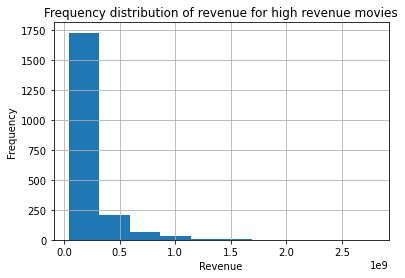

In [32]:
# Checking the distribution of the revenue

hi_rev.revenue.hist()

label("Frequency distribution of revenue for high revenue movies", 'Revenue', 'Frequency')

It appears the revenue data is still highly right-skewed. More details are present in the statistical description below

In [33]:
hi_rev.revenue.describe() # Gives a statistical description of the revenues column

count    2.041000e+03
mean     1.927170e+08
std      2.090377e+08
min      4.433202e+07
25%      7.217958e+07
50%      1.195000e+08
75%      2.227242e+08
max      2.781506e+09
Name: revenue, dtype: float64

As shown in the description as well as the histogram, 75% of the movies generated less than 500 million. This explains the skew

### Evaluating revenue against numerical variables

We will now plot scatterplots of revenue with each of the numerical variable in the data (popularity, budget, runtime, vote_count and vote_average)

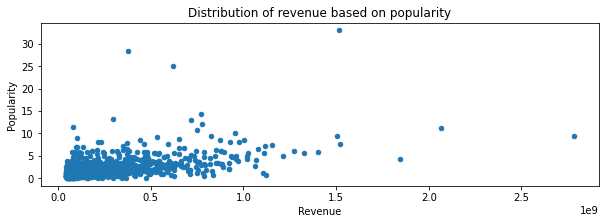

In [34]:
# Let's compare revenue with popularity

hi_rev.plot('revenue', 'popularity', kind= 'scatter', figsize=(10,3))

label("Distribution of revenue based on popularity", 'Revenue', 'Popularity')

The plot shows there is a positive correlation between the revenue generated and the popularity of the movie

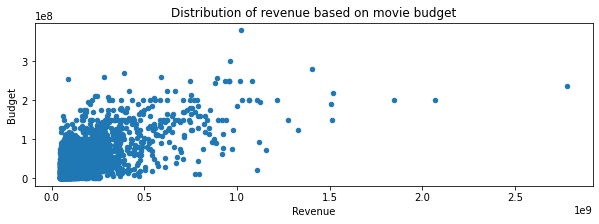

In [35]:
# Let's compare revenue and budget

hi_rev.plot('revenue', 'budget', kind= 'scatter', figsize=(10,3))

label("Distribution of revenue based on movie budget", 'Revenue', 'Budget')

The plot shows there is a positive correlation between the revenue generated and the movie's budget

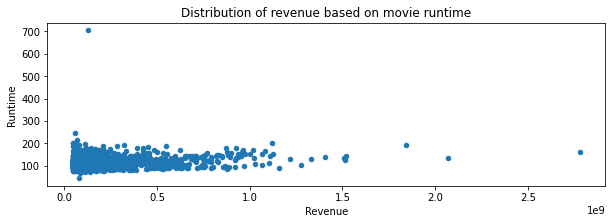

In [36]:
# Let's compare revenue and runtime

hi_rev.plot('revenue', 'runtime', kind= 'scatter', figsize=(10,3))

label("Distribution of revenue based on movie runtime", 'Revenue', 'Runtime')

The plot shows there is a positive correlation between the revenue generated and the runtime

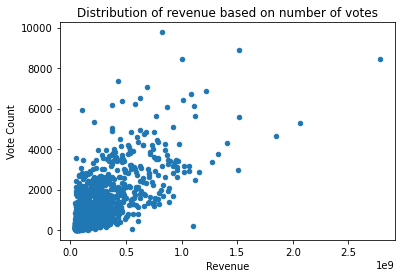

In [37]:
# Let's compare revenue and vote count

hi_rev.plot('revenue', 'vote_count', kind= 'scatter')

label("Distribution of revenue based on number of votes", 'Revenue', 'Vote Count')

The plot shows there is a positive correlation between the revenue generated and the number of votes received by each movie

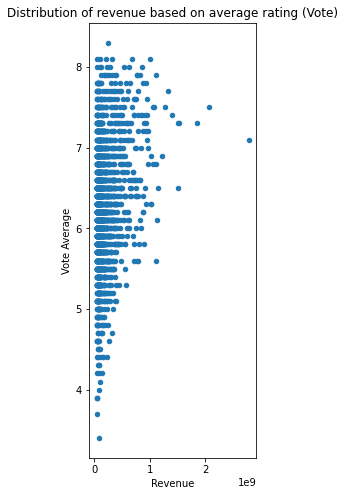

In [38]:
# Let's compare revenue and vote average

hi_rev.plot('revenue', 'vote_average', kind= 'scatter', figsize=(3,8))

label("Distribution of revenue based on average rating (Vote)", 'Revenue', 'Vote Average')

The plot shows there is a positive correlation between the revenue generated and the average rating received by each movie. It is also evident that the number of movies that received a rating less than 5 is small compared to number of movies that were rated above 5.

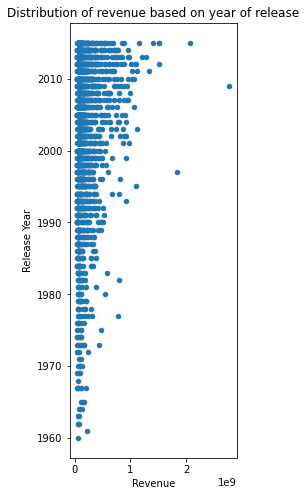

In [39]:
# Let's compare revenue and release year

hi_rev.plot('revenue', 'release_year', kind= 'scatter', figsize=(3,8))

label("Distribution of revenue based on year of release", 'Revenue', 'Release Year')

Although release year is not a numerical variable, it can be treated as one in this case. From the plot, it shows that more recent movies generated more revenue that older movies

### Evaluating revenue against categorical variables

Bearing in mind that **hi_rev** data we are working with has a very wide range of revenue (between 46 Million and 2.7 Billion) and can render our analysis inacurate. In order to get a more accurate analysis, we narrow-down our high revenue sample. From the statistical description of **hi_rev** data, we can narrow our analysis to revenue values above the 75th percentile. Columns like **Cast**, **Genres** and **Production Companies** would be exploded to make the elements of the list accessible

In [40]:
# Let's review the descriptive statistics of the revenue column

hi_rev.revenue.describe()

count    2.041000e+03
mean     1.927170e+08
std      2.090377e+08
min      4.433202e+07
25%      7.217958e+07
50%      1.195000e+08
75%      2.227242e+08
max      2.781506e+09
Name: revenue, dtype: float64

In [41]:
# Let's check the number of records above the 75th percentile if it is not too small (relatively) for the analysis

hi_rev[hi_rev.revenue > 2.227242e08].shape

(510, 13)

510 records out of 2041 records in **hi_rev** data is good enough

In [42]:
# Let's create a dataframe containing revenue records above the 75th percentile

upper_hi_rev = hi_rev[hi_rev.revenue > 2.227242e08]

# Confirming from its minimum revenue if the data is correct

upper_hi_rev.revenue.min()

222809600

We will now analyse revenue against **Cast**, **Director**, **Genres** and **Production Companies** columns. 

##### Against 'Director' column

In [43]:
upper_hi_rev.director.value_counts().head(10)

# These are the directors with the highest number of movies

Steven Spielberg      18
Michael Bay            8
Robert Zemeckis        8
Peter Jackson          7
Ridley Scott           7
Chris Columbus         7
Ron Howard             6
Tim Burton             6
M. Night Shyamalan     6
Christopher Nolan      5
Name: director, dtype: int64

These directors directed the highest number of high revenue movies

##### Against 'Cast' column

In [44]:
# Fixing 'cast' data for exploration, we first create a new data in order not to alter the main data

upper_hi_rev_cast = upper_hi_rev.explode('cast')

upper_hi_rev_cast.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Bryce Dallas Howard,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Irrfan Khan,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Vincent D'Onofrio,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,Nick Robinson,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015


In [45]:
upper_hi_rev_cast.cast.value_counts().head(10)

Tom Cruise        17
Tom Hanks         14
Will Smith        13
Bruce Willis      12
Liam Neeson       11
Robin Williams    11
Cameron Diaz      11
Brad Pitt         11
Gary Oldman       10
Harrison Ford     10
Name: cast, dtype: int64

These are the top 10 actors and actresses that featured in numerous high revenue movies

##### Against 'Genres' column

In [46]:
# Fixing 'genres' data for exploration, we first create a new data in order not to alter the main data

upper_hi_rev_gen = upper_hi_rev.explode('genres')

upper_hi_rev_gen.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Action,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Adventure,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Science Fiction,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,Thriller,"[Universal Studios, Amblin Entertainment, Lege...",5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,"[Tom Hardy, Charlize Theron, Hugh Keays-Byrne,...",George Miller,120,Action,"[Village Roadshow Pictures, Kennedy Miller Pro...",6185,7.1,2015


In [47]:
upper_hi_rev_gen.genres.value_counts().head(10)

Action             237
Adventure          231
Comedy             169
Thriller           140
Drama              132
Family             127
Fantasy            124
Science Fiction    116
Animation           87
Romance             64
Name: genres, dtype: int64

These are the top 10 genres of movies that generated high revenue

##### Against 'Production Companies' column

In [48]:
# Fixing 'production_companies' data for exploration, we first create a new data in order not to alter the main data

upper_hi_rev_prod = upper_hi_rev.explode('production_companies')

upper_hi_rev_prod.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Amblin Entertainment,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Legendary Pictures,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Fuji Television Network,5562,6.5,2015
0,135397,32.985763,150000000,1513528810,Jurassic World,"[Chris Pratt, Bryce Dallas Howard, Irrfan Khan...",Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Dentsu,5562,6.5,2015


In [49]:
upper_hi_rev_prod.production_companies.value_counts().head(10)

Warner Bros.                              72
Universal Pictures                        60
Paramount Pictures                        56
Twentieth Century Fox Film Corporation    52
Walt Disney Pictures                      44
Columbia Pictures                         36
Amblin Entertainment                      28
New Line Cinema                           23
Village Roadshow Pictures                 22
DreamWorks Animation                      21
Name: production_companies, dtype: int64

These are the top 10 production companies that produced the highest number of high revenue movies

<a id='conclusions'></a>
## Conclusions

### Research Question 1 (Which genres are most popular from year to year?)
From the analysis, I drew the following conclusions
<li>Animation movies emerged most-popular movie of the year 13 times. Although, it appears it last happened back in the late 90's, it was probably one of people's favourite movies in the last 4 decades of the 20th century
<li>Fantasy movies made the list for 7 years in a row. There is a possibility of this resulting from a good movie being released in seasons every year for that 7-year period. More analysis is needed to ascertain the exact reason for this
<li>Adventure movies of 2015 had the highest mean popularity of all time. One or more movies must have recorded a very high popularity value. More analysis is needed to understand why.

### Research Question 2 (What kinds of properties are associated with movies that have high revenues?)
From the analysis, I made the following observations/conclusions
<li> More than half of the movies data recorded zero revenue. This can be attributed to error during the data collection process and not the movies' performance. 
<li> Some of the concerned movies above had votes and runtimes which could mean some revenue was generated but was not recorded
<li> A positive correlation was observed between revenue and all the numerical columns with some correlations stronger than others
<li> A high percentage of high (above average) revenue movies received a rating greater than 5. The high ratings could have pulled more views for those movies and thus leading to more sales
<li> Newer movies generated more revenue than older movies. The advent of internet could be the reason for this as internet facilitates more sales
<li> Action movies generated high revenues the most followed by Adventure movies (Note: This does not mean their revenues were the highest)
<li> Warner Bros produced the most number of high revenue movies followed by Universal Pictures
<li> James Cameron's "Avatar" generated a whooping sum of 2.7 Billion, the highest revenue of all time

### Limitations
The analysis of revenue against categorical variables only analysed which values had the most occurences between the 75th and 100th percentile. It did not cover what the revenues of those respective movies are or the contribution of each categorical variable to the revenue. More exploration is needed to answer deeper questions.

### References
N/A